<a href="https://colab.research.google.com/github/lkamimura/SDC/blob/main/UT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#install control without showing results
!pip install control > /dev/null

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import *
import scipy.interpolate as interpolate
import control as ct
from control.matlab import *
from IPython.display import display, Latex

In [10]:
u, m, b, K, x, s = symbols('u m b K x s')
eq1=Eq(m*x*s**2+b*x*s+K*x-u,0)
sol=solve(eq1,x)
print('x/u = ')
factor(sol[0]/u).collect(s)

x/u = 


1/(K + b*s + m*s**2)

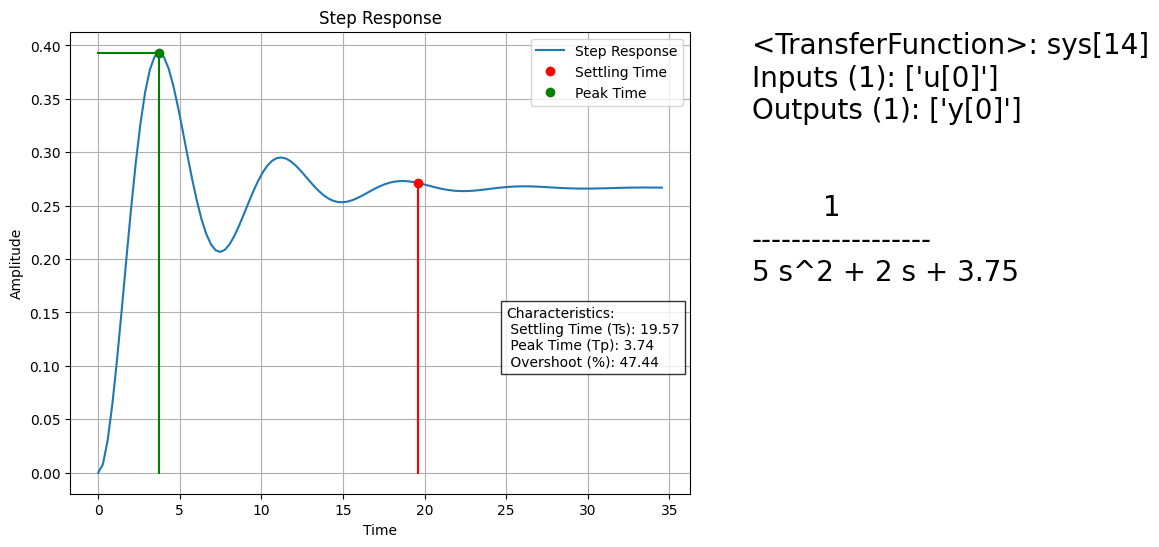

In [11]:
k1 = 5;k2 = 15;K = k1*k2/(k1+k2);b = 2;m = 5
#K=4/15

sys = tf([1],[m, b , K])

plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
yout, T = step(sys)
plt.plot(T.T, yout.T, label='Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Step Response')
plt.grid(True)
plt.legend()

fint=interpolate.interp1d(T, yout, kind='cubic')
info = stepinfo(sys)
rt = info['RiseTime']
ts = info['SettlingTime']
settling_min = info['SettlingMin']
settling_max = info['SettlingMax']
overshoot = info['Overshoot']
undershoot = info['Undershoot']
peak = info['Peak']
tp = info['PeakTime']

yts=fint(ts)
ytp=fint(tp)
plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top',
          transform=plt.gca().transAxes, fontsize=20)

plt.text(25, 0.1,f"Characteristics:\n"f" Settling Time (Ts): {ts:.2f}\n"
f" Peak Time (Tp): {tp:.2f}\n"f" Overshoot (%): {overshoot:.2f}",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.plot(ts, yts, 'ro', label='Settling Time')
plt.plot([ts,ts], [0,yts], 'r')
plt.plot([tp,tp], [0,ytp],'g')
plt.plot([0,tp], [ytp,ytp],'g')
plt.plot(tp, ytp,'go', label='Peak Time')
plt.legend()
plt.show()

In [12]:
# prompt: extract stepinfo values

info = stepinfo(sys)
rise_time = info['RiseTime']
settling_time = info['SettlingTime']
settling_min = info['SettlingMin']
settling_max = info['SettlingMax']
overshoot = info['Overshoot']
undershoot = info['Undershoot']
peak = info['Peak']
peak_time = info['PeakTime']

print(f"Rise Time: {rise_time}")
print(f"Settling Time: {settling_time}")
print(f"Settling Minimum: {settling_min}")
print(f"Settling Maximum: {settling_max}")
print(f"Overshoot: {overshoot}")
print(f"Undershoot: {undershoot}")
print(f"Peak: {peak}")
print(f"Peak Time: {peak_time}")

Rise Time: 1.4391156831212784
Settling Time: 19.57197329044938
Settling Minimum: 0.20666450683153134
Settling Maximum: 0.39316841790623314
Overshoot: 47.438156714837426
Undershoot: 0
Peak: 0.39316841790623314
Peak Time: 3.741700776115323


Recu 29/7

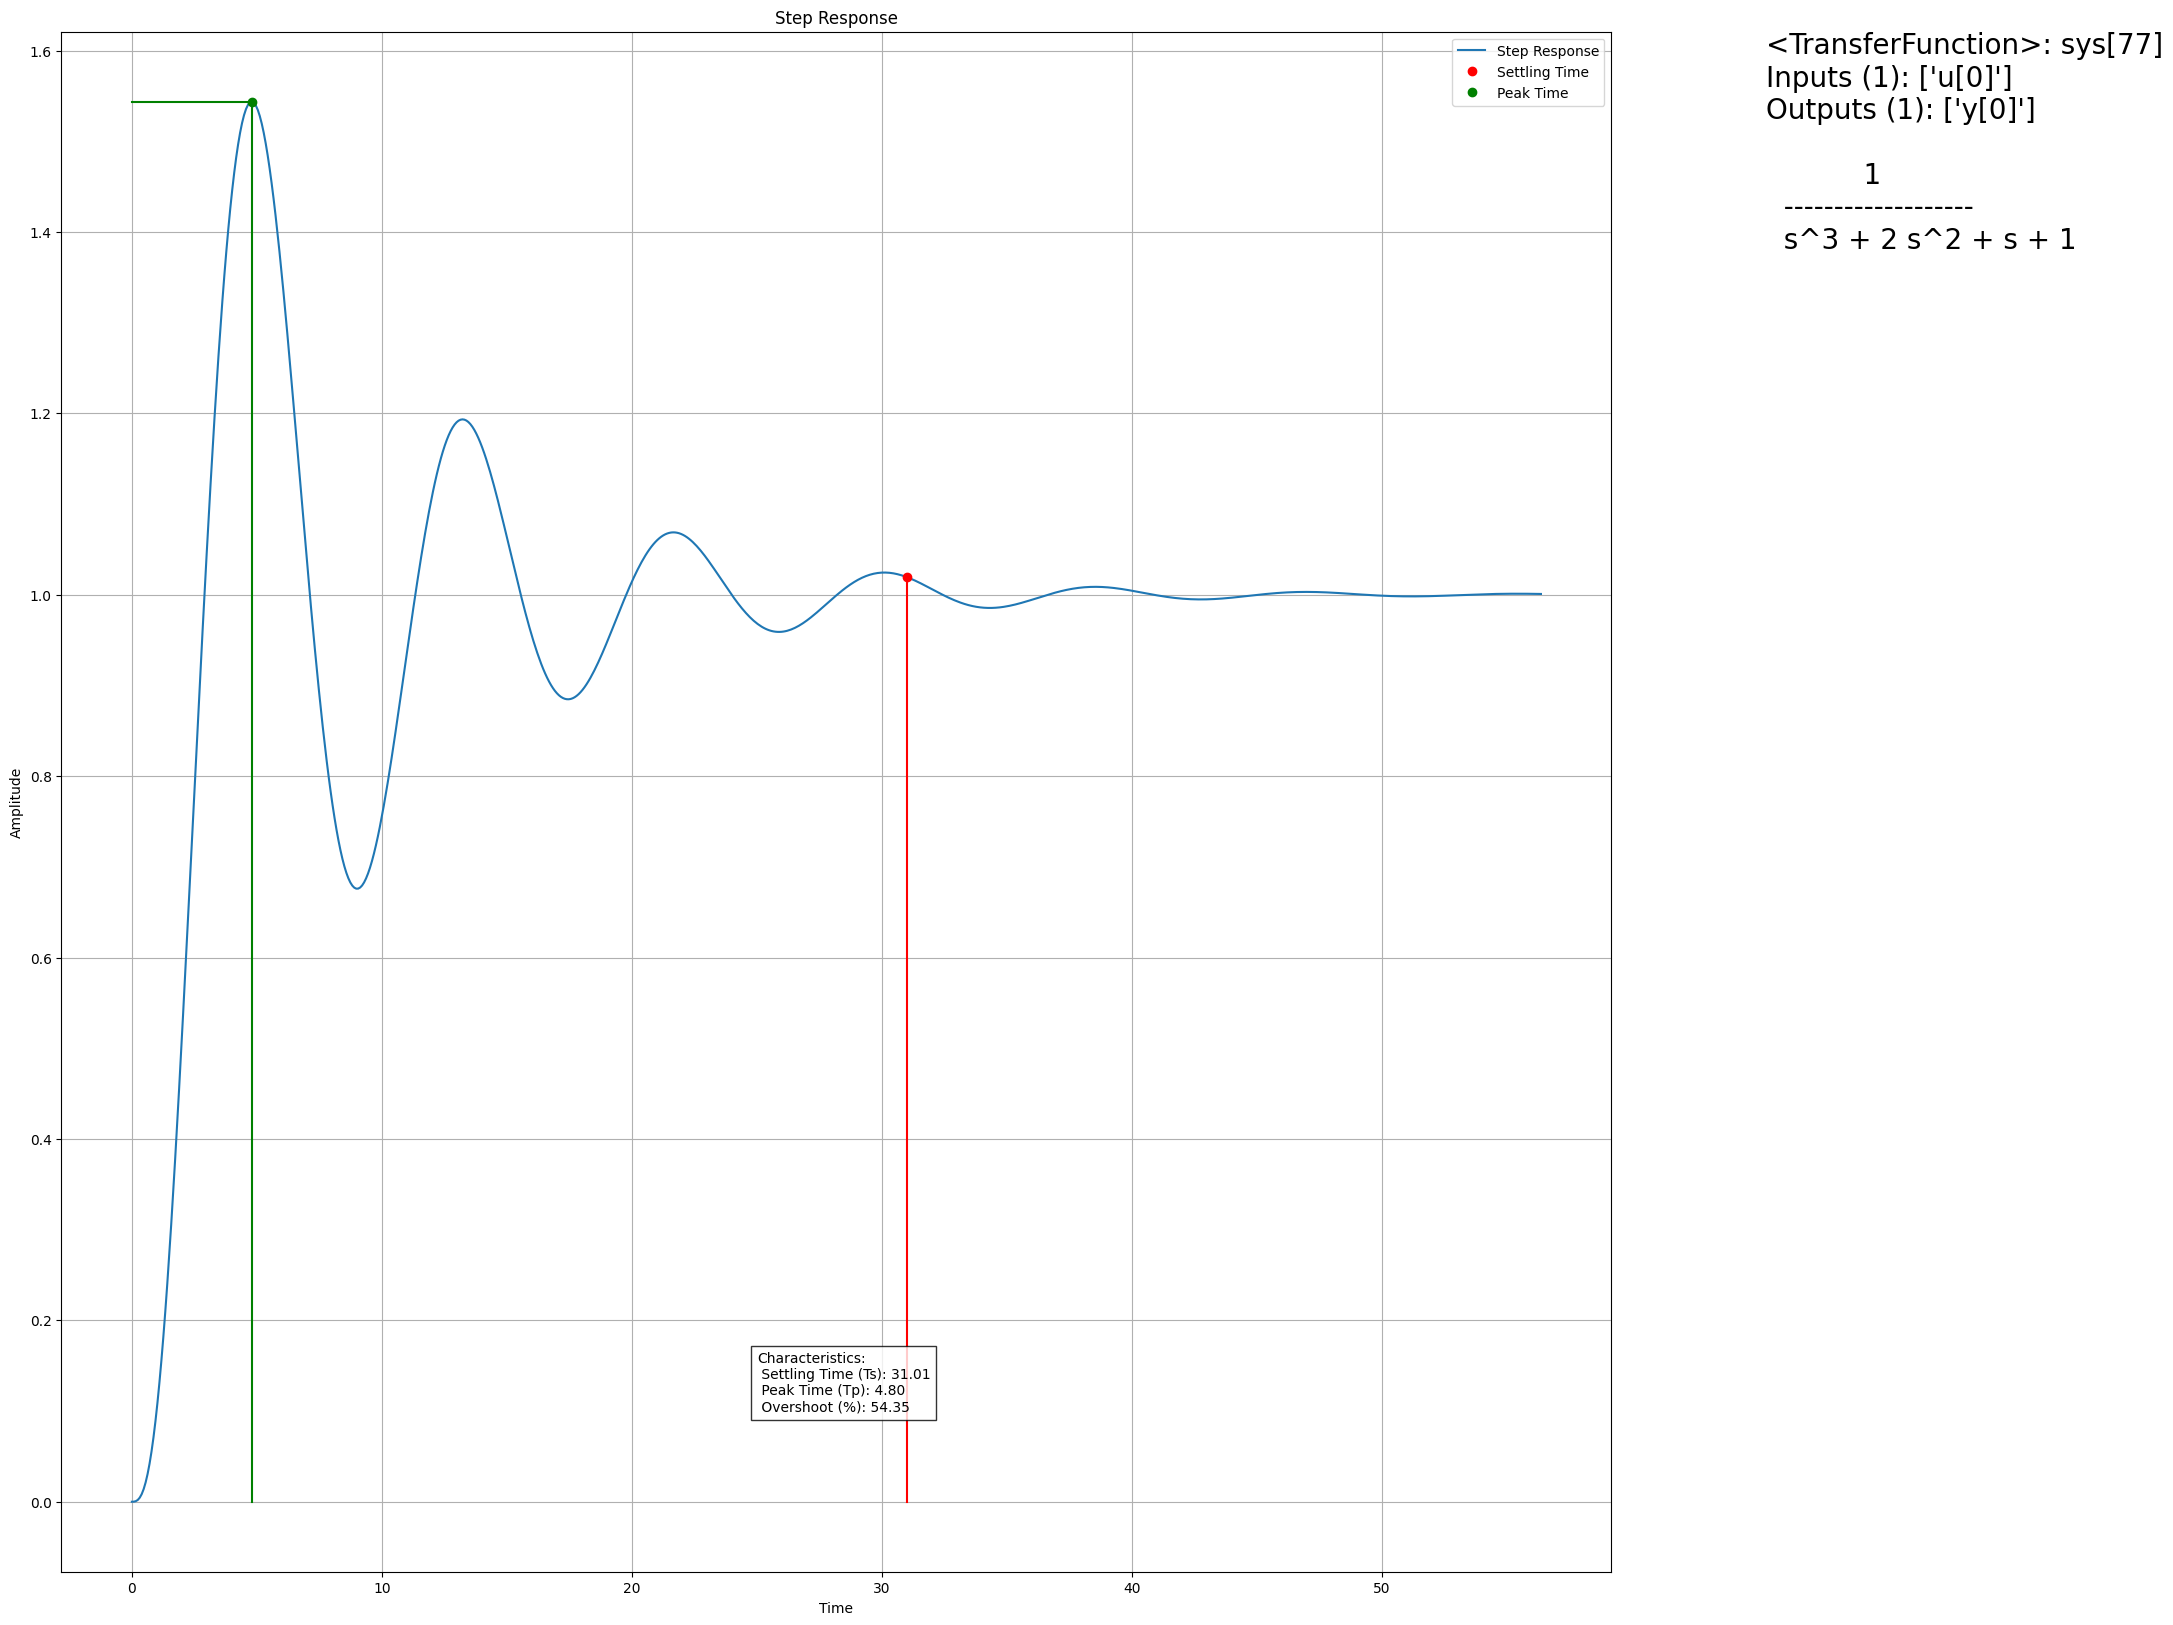

In [23]:
import control
from control.matlab import *
import matplotlib.pyplot as plt
import sympy
import scipy.interpolate as interpolate


Kt=1;L=1;J=1;B=1;R=1;

G = tf([Kt/L/J],[J,  B/J+R/L, R*B/L/J, 0])

sys = feedback(G,1)

plt.figure(figsize=(20, 20))  # Adjust figure size for better readability
yout, T = step(sys)
plt.plot(T.T, yout.T, label='Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Step Response')
plt.grid(True)
plt.legend()

fint=interpolate.interp1d(T, yout, kind='cubic')
info = stepinfo(sys)
rt = info['RiseTime']
ts = info['SettlingTime']
settling_min = info['SettlingMin']
settling_max = info['SettlingMax']
overshoot = info['Overshoot']
undershoot = info['Undershoot']
peak = info['Peak']
tp = info['PeakTime']

yts=fint(ts)
ytp=fint(tp)
plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top',
          transform=plt.gca().transAxes, fontsize=20)

plt.text(25, 0.1,f"Characteristics:\n"f" Settling Time (Ts): {ts:.2f}\n"
f" Peak Time (Tp): {tp:.2f}\n"f" Overshoot (%): {overshoot:.2f}",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.plot(ts, yts, 'ro', label='Settling Time')
plt.plot([ts,ts], [0,yts], 'r')
plt.plot([tp,tp], [0,ytp],'g')
plt.plot([0,tp], [ytp,ytp],'g')
plt.plot(tp, ytp,'go', label='Peak Time')
plt.legend()
plt.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


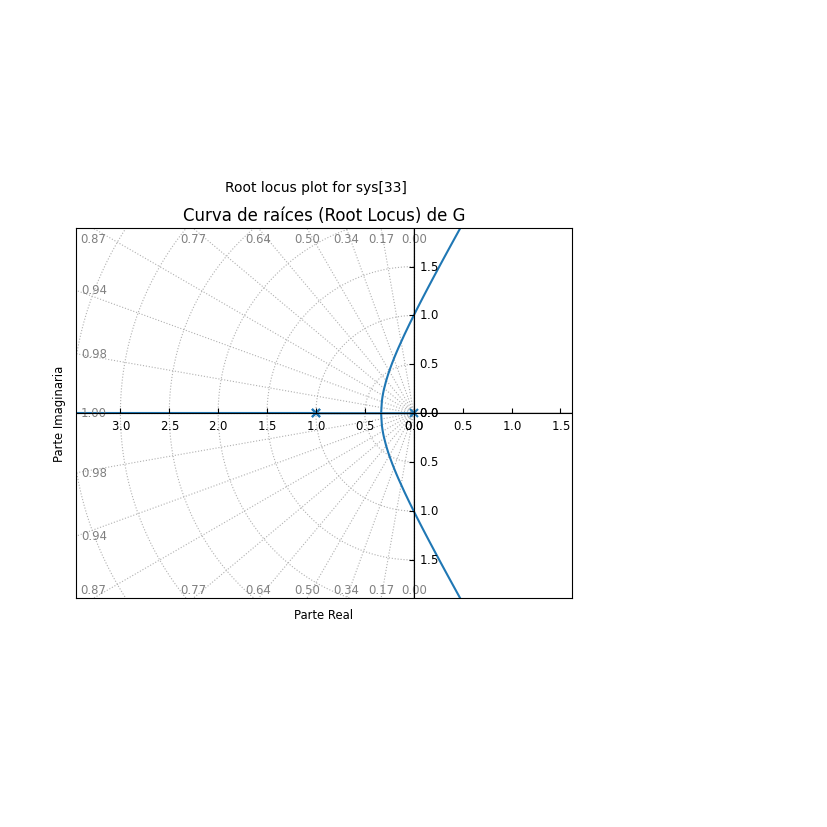

In [14]:
# Curva de raíces (Root Locus) de G
rlocus(G)
plt.title('Curva de raíces (Root Locus) de G')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.show()

In [17]:
poles = pole(G)
print("Polos de G:", poles)


Polos de G: [-1.+0.j -1.+0.j  0.+0.j]
